In [35]:
%run analyses/imports.py

### 메타데이터 분석
### 사용 방법
- imports.py에서 `your_root_dir` 지정
- 추가적으로 수정할 것 없이 순차 실행

In [36]:
pd.set_option('display.max_columns', None)
# 프레임 repr에서 자동 줄바꿈 비활성화
pd.set_option('display.expand_frame_repr', False)
# 출력 폭 제한 해제
pd.set_option('display.width', None)

In [37]:
file_path = f'{your_root_dir}/TSB-AD/analyses/metadata.csv'

In [38]:
df = pd.read_csv(file_path)

In [39]:
# Curated 열의 총합
curated_sum = df['Curated'].sum()
print(f"Total number of curated samples: {curated_sum}")

Total number of curated samples: 200


In [40]:
def sort_by_column(df, column_name, descending=True):
    """
    Sort the DataFrame by a specified column.
    
    :param df: DataFrame to sort
    :param column_name: Column name to sort by
    :param descending: Sort order (default is descending)
    :return: Sorted DataFrame
    """
    return df.sort_values(by=column_name, ascending=not descending)

#### 메타데이터 분석
- 컬럼 이름을 기준으로 정렬 후 출력
- **Curated**는 데이터세트(e.g. MITDB) 내 시계열 데이터가 몇 개인지를 나타냄
- **Category** '0'은 Sequence anomaly만, '1'은 Point와 Sequence anomaly를 모두 포함

In [41]:
for column_name in column_names:
    print(f"{column_name}")

AvgDim
AvgTSLen
AvgNumAnomaly
AvgAnomalyLen
AnomalyRatio
Category


In [45]:
# sort by AvgAnomalyLen and print all rows
sorted_df = sort_by_column(df, 'AvgDim')
print(f"All rows sorted by AvgAnomalyLen:\n{sorted_df}\n")

All rows sorted by AvgAnomalyLen:
          Name  Curated  AvgDim   AvgTSLen  AvgNumAnomaly  AvgAnomalyLen  AnomalyRatio  Category
4          OPP        8     248   17426.75            1.4          394.3           4.1         0
6         SWaT        2      59  207457.50           16.5         1093.6          12.7         0
9          MSL       16      55    3119.40            1.3          111.7           5.1         0
5          SMD       22      38   25466.40            8.9          112.8           3.8         0
10  CreditCard        1      29  284807.00          465.0            1.1           0.2         1
8         SMAP       27      25    7855.90            1.3          196.3           2.9         0
7          PSM        1      25  217624.00           72.0          338.6          11.2         1
2     Exathlon       27      21   60878.40            4.3         1373.3           9.8         0
0          GHL       25      19  199001.00            2.2         1035.2           1.1       

In [ ]:
def plot_data(df, normalize=False):
    names = df['Name'].tolist()
    print(names)
    column_names = df.columns[2:]  # 3번째 열부터 마지막 열까지 선택
    num_datasets = len(names)
    num_columns = len(column_names)

    # normalize the data on each column
    # 각 열의 최대값으로 나누어 정규화
    if normalize
        for column_name in column_names:
            df[column_name] = df[column_name] / df[column_name].max()

    # 각 열의 값을 순위로 변환시킨 rank_df 생성
    rank_df = df[column_names].rank(ascending=False, method='min')
    # rank_df에 'Name' 열 추가
    rank_df.insert(0, 'Name', df['Name'])
    rank_df.insert(1, 'Curated', df['Curated'])
    
    # 3) 정규화값(소수점 둘째 자리)과 순위를 "( )" 형태로 합치기
    combined_df = df.copy()
    for col in column_names:
        combined_df[col] = (
            df[col].map('{:.2f}'.format)
             + '('
             + rank_df[col].astype(int).map(str)
             + ')'
        )
    # Name, Curated 컬럼도 앞쪽에 위치시키려면
    combined_df.insert(0, 'Curated', combined_df.pop('Curated'))
    combined_df.insert(0, 'Name', combined_df.pop('Name'))
    
    plt.figure(figsize=(16, 10))
    colors = plt.get_cmap('tab20', num_datasets)

    for idx, name in enumerate(names):
        data = df.iloc[idx, 2:].values
        rank_data = rank_df.iloc[idx, 2:].values
        
        # 각 이름에 대한 선 그래프 그리기
        if name == 'GHL':
            plt.plot(range(num_columns), data, marker='*', linestyle='--', label=name, color=colors(idx))
        else:
            plt.plot(range(num_columns), data, marker='o', label=name, color=colors(idx))

        # data 값에 대한 순위를 plot 좌측 중간에 표시
        for col_idx, rank in enumerate(rank_data):
            plt.text(col_idx, data[col_idx], f'{int(rank)}', fontsize=8, ha='left', va='bottom')
        
    plt.xticks(range(num_columns), column_names)
    plt.xlabel('Columns')
    plt.ylabel('Rank')
    plt.title('Ranked Data by Name')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.show()

    return combined_df

#### 메타데이터 시각화
- 0-1 정규화 되어 있음
- 각 데이터 세트가 컬럼 별로 상대적으로 어느 정도 비중을 차지하는지 시각화함

['GHL', 'Daphnet', 'Exathlon', 'Genesis', 'OPP', 'SMD', 'SWaT', 'PSM', 'SMAP', 'MSL', 'CreditCard', 'GECCO', 'MITDB', 'SVDB', 'LTDB', 'CATSv2', 'TAO']


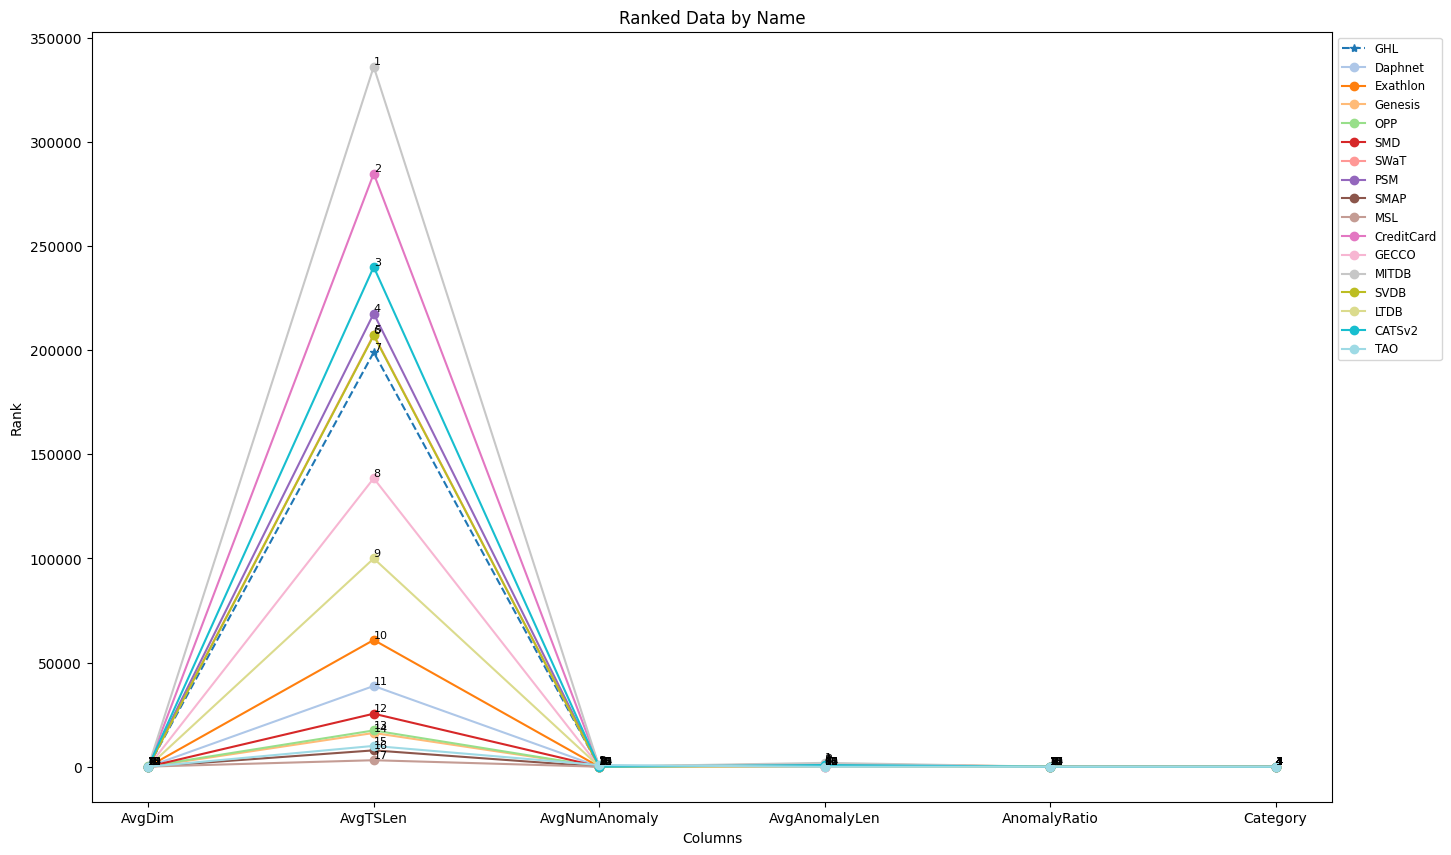

          Name  Curated     AvgDim      AvgTSLen AvgNumAnomaly AvgAnomalyLen AnomalyRatio Category
0          GHL       25   19.00(9)  199001.00(7)      2.20(14)    1035.20(4)     1.10(15)  0.00(4)
1      Daphnet        1   9.00(12)  38774.00(11)      6.00(11)     384.30(7)      5.90(6)  0.00(4)
2     Exathlon       27   21.00(8)  60878.40(10)      4.30(12)    1373.30(2)      9.80(4)  0.00(4)
3      Genesis        1  18.00(10)  16220.00(14)      3.00(13)     16.70(15)     0.30(16)  0.00(4)
4          OPP        8  248.00(1)  17426.75(13)      1.40(15)     394.30(6)      4.10(9)  0.00(4)
5          SMD       22   38.00(4)  25466.40(12)      8.90(10)    112.80(12)     3.80(10)  0.00(4)
6         SWaT        2   59.00(2)  207457.50(5)      16.50(7)    1093.60(3)     12.70(2)  0.00(4)
7          PSM        1   25.00(6)  217624.00(4)      72.00(4)     338.60(8)     11.20(3)  1.00(1)
8         SMAP       27   25.00(6)   7855.90(16)      1.30(16)    196.30(10)     2.90(12)  0.00(4)
9         

In [44]:
combined_df = plot_data(df)
print(combined_df)